In [1]:
import pandas as pd
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Q3
Please follow the instructions below and inspect the outputs before you proceed. You can always check this original final to compare your results in your own copy.

In [2]:
house=pd.read_csv('/content/drive/MyDrive/MS/Data viz/HW6/house_prices.csv')
house.head()

,Unnamed: 0,date,state,unemploy_perc,house_price_index,house_price_perc
0,1,1976-01-01,Alabama,6.7,37.138285,0.040405
1,2,1976-02-01,Alabama,6.7,37.756437,0.051806
2,3,1976-03-01,Alabama,6.6,38.276319,0.059302
3,4,1976-04-01,Alabama,6.5,38.596135,0.059585
4,5,1976-05-01,Alabama,6.4,38.740517,0.055723


a) For the states below, please select the rows from the house dataframe, and consider converting the date column to date data type as it may be coming in string format. Then use the head function to preview your new dataframe.

In [3]:
house['date'] = pd.to_datetime(house['date'])

states = ['Michigan', 'California', 'Texas', 'Indiana']

filtered_house = house[house['state'].isin(states)]

filtered_house.loc[:, 'date'] = pd.to_datetime(filtered_house['date'])

filtered_house.head()

,Unnamed: 0,date,state,unemploy_perc,house_price_index,house_price_perc
2016,2017,1976-01-01,California,9.1,17.908764,0.139067
2017,2018,1976-02-01,California,9.1,18.117587,0.148485
2018,2019,1976-03-01,California,9.0,18.379530,0.151243
2019,2020,1976-04-01,California,9.0,18.673067,0.147308
2020,2021,1976-05-01,California,8.9,18.899995,0.143167


b) Use the FacetGrid from seaborn to create line plots to represent house_price_index for each state. Please make the line color red, set ticks on x axis for years ['1980', '2000', '2020'], which you may have to convert date type again, put those years as labels, and set the titles for each small plot to their state names. In addition, set the y label to 'house price index' and remove the x label since it's obvious that these are years.

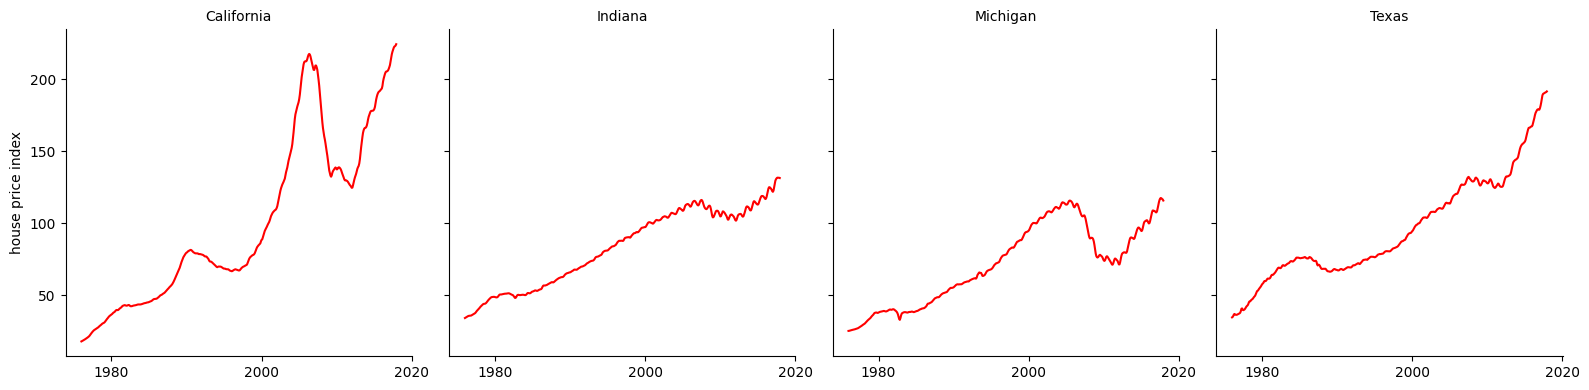

In [4]:
import matplotlib.pyplot as plt

g = sns.FacetGrid(filtered_house, col="state", col_wrap=4, height=4)

g.map(sns.lineplot, 'date', 'house_price_index', color='red')

g.set_titles("{col_name}")
g.set_axis_labels("", "house price index")
g.set(xticks=pd.to_datetime(['1980-01-01', '2000-01-01', '2020-01-01']))
g.set_xticklabels(['1980', '2000', '2020'])
plt.tight_layout()
plt.show()

c) Draw a lineplot for 'house price perc', but color them based on the 'state' name which will have four lines in a single plot. Set a legend which will be at the bottom of your graph and have them horizantally positioned next to eachother. Again, set the y label to house_price_perc and remove the x label since it's obvious. (Note that my y label is still showing index. Please ignore that.)

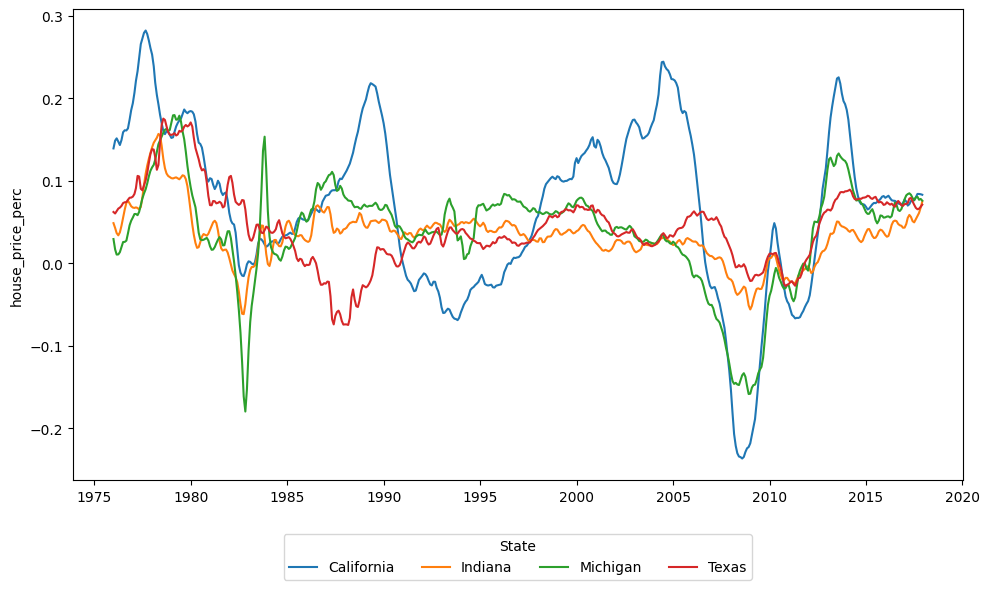

In [5]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_house, x='date', y='house_price_perc', hue='state', palette='tab10')

plt.xlabel('')
plt.ylabel('house_price_perc')
plt.legend(title='State', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)

plt.tight_layout()
plt.show()

##Q4
Please work on your 4th question below. Please feel free to add new code cells.

In [7]:
df = pd.read_csv('/content/drive/MyDrive/MS/Data viz/HW6/WorldCupMatches.csv')
df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


In [11]:
import os

# Part (a): Group by 'Home Team Initials' and 'Away Team Initials' to get the count of matches
df['weight'] = df.groupby(['Home Team Initials', 'Away Team Initials'])['Home Team Initials'].transform('count')

# Part (b): Calculate the total goals scored by each home team (sum of 'Home Team Goals')
df['HomeGoalTotal'] = df.groupby('Home Team Initials')['Home Team Goals'].transform('sum')

# Part (c): Create a new DataFrame 'team_pairs' with required columns
team_pairs = df[['Home Team Initials', 'Away Team Initials', 'weight', 'HomeGoalTotal']].drop_duplicates()

# set working directory
os.chdir('/content/drive/MyDrive/MS/Data viz/HW6')
# Part (d): Write 'team_pairs' DataFrame with the specified columns to a CSV file
team_pairs[['Home Team Initials', 'Away Team Initials', 'weight', 'HomeGoalTotal']].to_csv('team_pairs.csv', index=False)

# Check the first few rows of the 'team_pairs' DataFrame
print(team_pairs.head())

  Home Team Initials Away Team Initials  weight  HomeGoalTotal
0                FRA                MEX       4             68
1                USA                BEL       1             19
2                YUG                BRA       1             42
3                ROU                PER       1             15
4                ARG                FRA       2            111


Make sure that you only write four columns ('Home Team Initials', 'Away Team Initials', 'weight', 'HomeGoalTotal') from the data frame, team_pairs, to a csv file

In [12]:
!pwd

/content/drive/MyDrive/MS/Data viz/HW6
